# Monte Carlo Algorithms

1. Markov Chains
2. Markov Chain Monte Carlo (MCMC) via Metropolis-Hastings
3. The Wolff algorithm
4. The Wang-Landau algorithm for the density of states
5. The Heatbath algorithm
6. Benchmarking using exact results
7. Comparisons of algorithms using autocorrelation time

## Markov Chains

Some nice visualizations of transition matrices using code from Timothy Budd.

Using the theory of discrete Markov chains coupled with random sampling, one can generate a sequence which simulates a desired probability distribution, $\pi(x)$. There are two central notions:
1. (Perron-Froebenius) Any irreducible, aperiodic transition matrix $K$ has a long time behavior $K^n \approx I\cdot\pi$ where $\pi$ is the stationary distribution. In other words, Eigenval(K)=${\lambda_1,\lambda_2, ...}$ where $\lambda_1=1$ and $\lambda_i<0$ $\forall i>1$. These negative eigenvalues can be understood via relaxational dynamics.
2. Detailed balance implies global balance implies a stationary solution.

The idea for us to simulate a given physical model is then to create an iterative procedure (transition matrix) which given a current state will generate new states. Moreover, this procedure should be irreducible and aperiodic. The last condition of detailed balance ensures that the sequence will converge to the desired distribution. 

See my notes on Markov Chain Monte Carlo Details and The Transition Matrix.

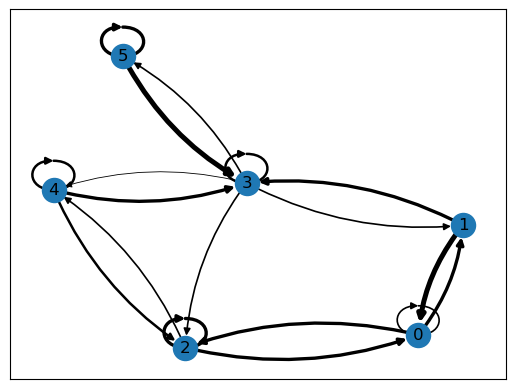

In [2]:
import networkx as nx, numpy as np

num_states = 6
transition_P = np.array([[0.2,0.4,0.4,  0,  0,  0],
                         [0.6,  0,  0,0.4,  0,  0],
                         [0.4,  0,0.4,  0,0.2,  0],
                         [  0,0.2,0.2,0.3,0.1,0.2],
                         [  0,  0,0.3,0.4,0.3,  0],
                         [  0,  0,  0,0.6,  0,0.4]])

def draw_transition_graph(P):
    # construct a directed graph directly from the matrix
    graph = nx.DiGraph(P)        
    # draw it in such a way that edges in both directions are visible and have appropriate width
    nx.draw_networkx(graph,connectionstyle='arc3, rad = 0.15',width=[6*P[u,v] for u,v in graph.edges()])
    
draw_transition_graph(transition_P)